In [12]:
import os
import csv
import re

# Define the folder where your text files are located
folder_path = 'bills/'
output_csv = 'retail_bills.csv'

# Define the columns for the CSV
columns = ['Bill Number', 'Customer Name', 'Phone Number', 'Product', 'Quantity', 'Price']

# Function to parse a single bill
def parse_bill(content):
    data = []
    
    # Extract header details (Bill Number, Customer Name, Phone Number)
    bill_number = re.search(r'Bill Number:\s*(\d+)', content)
    customer_name = re.search(r'Customer Name:\s*(.+)', content)
    phone_number = re.search(r'Phone Number:\s*(\d+)', content)
    
    bill_number = bill_number.group(1) if bill_number else None
    customer_name = customer_name.group(1).strip() if customer_name else None
    phone_number = phone_number.group(1) if phone_number else None

    # Extract product table details
    # Format: "ProductName   Quantity   Price"
    product_lines = re.findall(r'(\w.+?)\s+(\d+)\s+([\d]+)\s*Rs', content)
    for product, quantity, price in product_lines:
        data.append({
            'Bill Number': bill_number,
            'Customer Name': customer_name,
            'Phone Number': phone_number,
            'Product': product.strip(),
            'Quantity': quantity,
            'Price': price
        })

    return data

# Open the CSV file to write
with open(output_csv, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=columns)
    writer.writeheader()  # Write header row

    # Process each text file in the folder
    for text_file in os.listdir(folder_path):
        if text_file.endswith('.txt'):
            file_path = os.path.join(folder_path, text_file)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read()

                # Parse the content of the text file
                parsed_data = parse_bill(content)
                
                # Write the parsed data to the CSV
                if parsed_data:
                    writer.writerows(parsed_data)

print(f"Parsed retail bill data saved to {output_csv}")


Parsed retail bill data saved to retail_bills.csv


In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('retail_bills.csv')
df.head()

,Bill Number,Customer Name,Phone Number,Product,Quantity,Price
0,527,Rohan,730260783.0,Bath soap,1,20
1,527,Rohan,730260783.0,Face Cream,2,180
2,527,Rohan,730260783.0,Hair Spray,4,420
3,527,Rohan,730260783.0,Hair Gel,2,80
4,527,Rohan,730260783.0,Rice,5,600


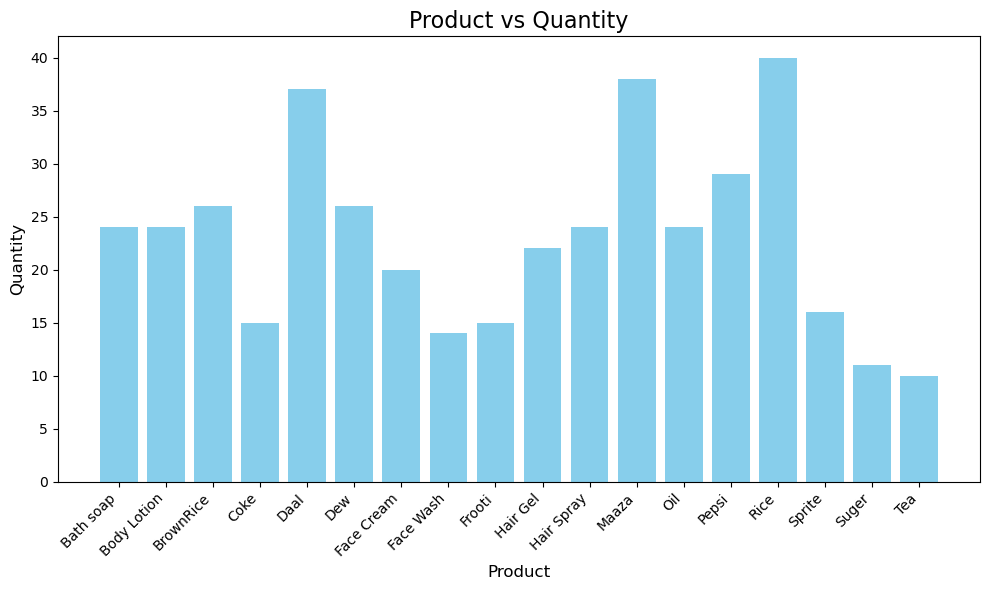

: 

In [ ]:
grouped_data = df.groupby('Product')['Quantity'].sum().reset_index()

# Plot the data using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Product'], grouped_data['Quantity'], color='skyblue')

# Customize the plot
plt.title('Product vs Quantity', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate product names for better readability
plt.tight_layout()

# Show the plot
plt.show()